In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [114]:
df = pd.read_csv('delta_shift.csv')
df.describe()

,index,Vision,Motor,Socialness,Emotion_abs+1,Time,Space,score_t,score_t1
count,611.000000,605.000000,605.000000,605.000000,605.000000,605.000000,605.000000,611.000000,611.000000
mean,11.134206,-0.153215,-0.043209,0.097107,0.110101,0.016461,-0.032048,20.815756,25.502432
std,9.950121,2.700795,1.484653,2.694372,1.229266,0.988731,1.985546,18.445467,27.692704
min,1.000000,-8.617692,-5.377238,-10.344372,-7.058238,-5.732579,-7.117798,-7.796682,-7.796682
25%,4.000000,-1.640430,-1.012615,-1.435018,-0.617529,-0.487211,-1.039002,5.862847,5.862847
50%,9.000000,-0.037309,0.000000,0.115690,0.055946,-0.001278,0.000000,15.946947,15.946947
75%,15.000000,1.168285,0.915123,1.469450,0.801110,0.554521,1.153756,34.135956,38.460443
max,57.000000,7.908434,4.174837,9.437030,6.831466,5.541872,6.132615,67.087452,100.000000


44
[4, 0, 9, 0, 0, 1]


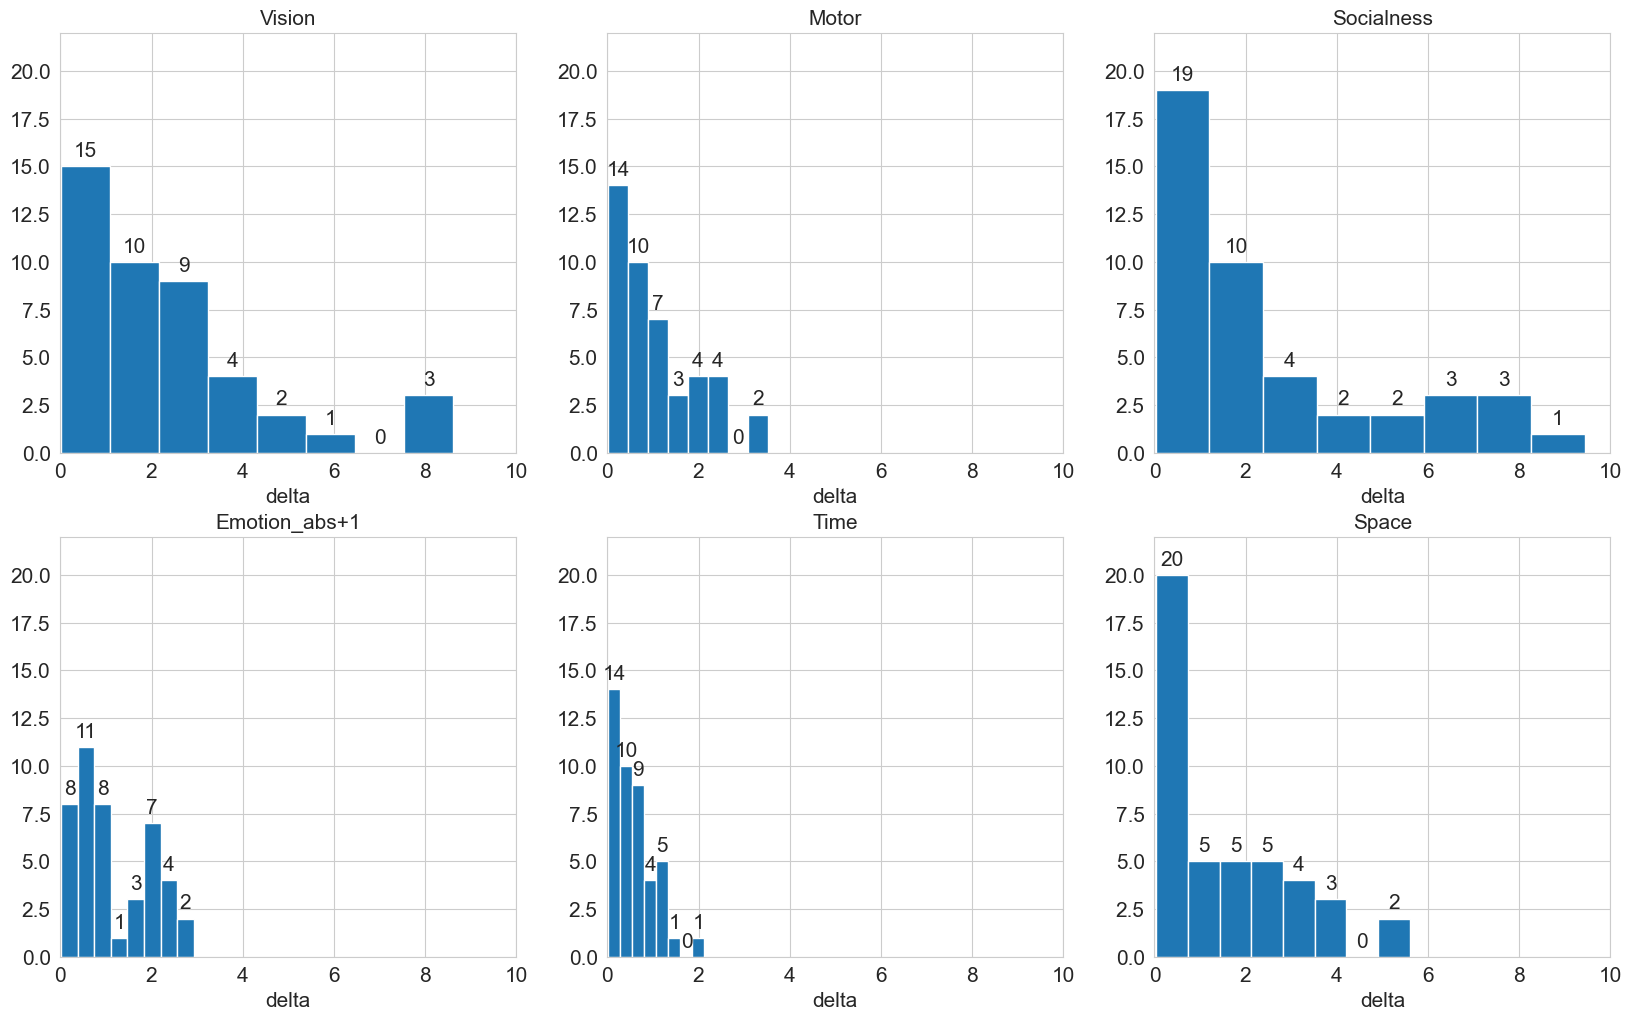

In [115]:
shift_tra = 0
shift_dims = [0] * 6
res = 0
res_index = 0
deltas = [list() for x in range(6)]
title_list = ["Vision", "Motor", "Socialness", "Emotion_abs+1", "Time", "Space"]
for i in range(len(df)):
    res = 0
    if abs(df['score_t1'][i] - df['score_t'][i]) > 50 and not pd.isna(df.iloc[i, 5]):
        shift_tra += 1
        for j in range(6):
            deltas[j].append(abs(df[title_list[j]][i]))
            if res < abs(df[title_list[j]][i]):
                res = abs(df[title_list[j]][i])
                res_index = j
        if res > 5:
            shift_dims[res_index] += 1
print(shift_tra)
print(shift_dims)

plt.figure(figsize=(20, 12))
for i in range(1, 7):
    plt.subplot(2, 3, i)
    counts, bin_edges, _ = plt.hist(deltas[i - 1], bins=8)
    plt.title(title_list[i - 1], fontsize=15)
    plt.xlim(0, 10)
    plt.ylim(0, 22)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.xlabel("delta", fontsize=15)
    for j in range(len(counts)):
        count = counts[j]
        x_position = (bin_edges[j] + bin_edges[j + 1]) / 2  # 计算bin中心的x坐标
        y_position = count + 0.3  # 在bin上方添加标签
        plt.text(x_position, y_position, str(int(count)), ha='center', va='bottom', fontsize=15)
plt.show()

In [116]:
shift_tra = 0
shift_dims = [0] * 6
res = 0
res_index = 0
title_list = ["Vision", "Motor", "Socialness", "Emotion_abs+1", "Time", "Space"]
for i in range(len(df)):
    res = 0
    if pd.isna(df.iloc[i, 5]):
        continue
    for j in range(6):
        if res < abs(df[title_list[j]][i]):
            res = abs(df[title_list[j]][i])
            res_index = j
    if res > 5:
        shift_dims[res_index] += 1
        if abs(df['score_t1'][i] - df['score_t'][i]) > 50:
            shift_tra += 1
print(shift_dims)
print(shift_tra)

[43, 0, 41, 2, 2, 14]
14


In [117]:
data = df.iloc[:, 5:11]
data.dropna(inplace=True)
title_list = ["Vision", "Motor", "Socialness", "Emotion_abs+1", "Time", "Space"]
arr = []
for i in range(6):
   arr.append(np.array([abs(x) for x in data[title_list[i]]]))
ave = []
for dim in arr:
    ave.append(np.mean(dim))
print(ave)

[2.025877101448641, 1.1768899220559474, 1.9816094187391713, 0.9128084456782254, 0.6762456702416835, 1.4993517198423698]


In [ ]:
'H5044'